In [1]:
#import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("collegePlace.csv")
df.shape

(2966, 8)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [5]:
df.head(5)

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


## EDA

In [4]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [7]:
df.describe(include = 'all')

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966,2966,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
unique,NaN,2,6,NaN,NaN,NaN,NaN,NaN
top,NaN,Male,Computer Science,NaN,NaN,NaN,NaN,NaN
freq,NaN,2475,776,NaN,NaN,NaN,NaN,NaN
mean,21.485840,NaN,NaN,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,NaN,NaN,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,NaN,NaN,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,NaN,NaN,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,NaN,NaN,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,NaN,NaN,1.000000,8.000000,1.000000,0.000000,1.000000


C:\Users\rajes\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Gender', ylabel='count'>

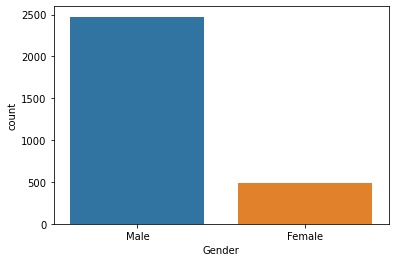

In [12]:
# gender

import seaborn as sns

sns.countplot(df['Gender'])

In [13]:
df['Gender'].value_counts(normalize=True)

Male      0.834457
Female    0.165543
Name: Gender, dtype: float64

In [23]:

import seaborn as sns
import matplotlib.pyplot as plt

def catg_eda(df, colname, target):
    print(colname)
    ax = sns.countplot(x=df[colname], hue = df[target], data=df)
    ax.set_title(colname + " vs " + target)
    for p in ax.patches:
        ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='white', size=10)
    plt.show()

In [14]:
list(df)

['Age',
 'Gender',
 'Stream',
 'Internships',
 'CGPA',
 'Hostel',
 'HistoryOfBacklogs',
 'PlacedOrNot']

Gender


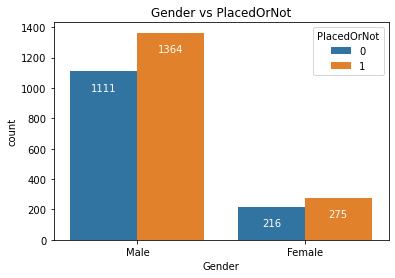

Stream


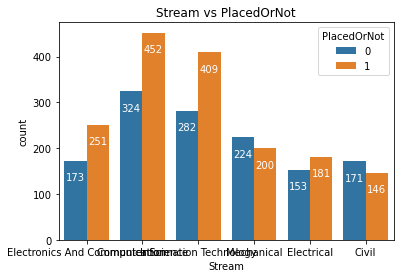

In [24]:
catg_cols = ['Gender', 'Stream']
target = 'PlacedOrNot'
for i, col_name in enumerate(catg_cols):
    catg_eda(df,col_name, target)

In [39]:
#top 3 streams with higher %placed
print(pd.crosstab(df.Stream, df.PlacedOrNot, margins = True, normalize = 'index')[1].sort_values(ascending=False)[0:3])
print(pd.crosstab(df.Stream, df.PlacedOrNot, margins = True, normalize = 'index')[1].sort_values()[0:3])

Stream
Electronics And Communication    0.591981
Information Technology           0.591896
Computer Science                 0.582474
Name: 1, dtype: float64
Stream
Civil         0.460568
Mechanical    0.471698
Electrical    0.541916
Name: 1, dtype: float64


In [42]:
print(pd.crosstab(df.Gender, df.PlacedOrNot, margins = True, normalize = 'index')[1].sort_values(ascending=False)[0:1])

Gender
Female    0.560081
Name: 1, dtype: float64
